In [90]:
%matplotlib inline
import numpy
import math
from seaborn import plt

In [111]:
def par(*rs):
    rs = numpy.atleast_1d(rs)
    return 1 / sum(1 / rs)

def divider(vin, rbottom, rtop):
    vout = vin * rbottom / (rbottom + rtop)
    return vout

def curved_pot(vin, pos, rpot, rcurve=numpy.inf):
    """
     ^ Vin
     |
    [ ] Rpot
    [ ]<--------+---> Vout
    [ ](pos)    |
     |         [ ]
     |         [ ] Rcurve
     |         [ ]
     |          |
     +----------+
     |
     0V
    """
    rpot_bottom = rpot * pos
    rpot_top = rpot * (1 - pos)
    r_bottom = par(rpot_bottom, rcurve)
    return divider(vin, r_bottom, rpot_top)

RESISTOR_MANTISSAS_E6 = numpy.array([1.0, 1.5, 2.2, 3.3, 4.7, 6.8])

def mantissa_exponent(x, base=10):
    exponent = math.floor(math.log(x, base))
    mantissa = x / base**exponent
    return (mantissa, exponent)

def resistors_in_range(a, b):
    _, aexp = mantissa_exponent(a)
    _, bexp = mantissa_exponent(b)
    for exp in range(aexp, bexp + 1):
        for mantissa in RESISTOR_MANTISSAS_E6:
            value = mantissa * 10**exp
            if a <= value < b:
                yield value

def power_decibels(x):
    return 10 * numpy.log10(x)

def amplitude_decibels(x):
    return 2 * power_decibels(x)

In [112]:
def pot_curves(rpot, rcurves=None, figsize=(12, 6)):
    if not rcurves:
        rcurves = list(resistors_in_range(0.05 * rpot, 0.6 * rpot))

    pos = numpy.linspace(0, 1, 300)
    fig = plt.figure(figsize=figsize)
    for rcurve in rcurves:
        plt.plot(100 * pos, curved_pot(1, pos, rpot, rcurve), label="{} ohm".format(rcurve))
    plt.gca().set_ylabel("Voltage ratio")
    plt.gca().set_xlabel("Pot position (%)")
    plt.suptitle("Curvature for {:.0f} ohm pot with a resistor connected to wiper".format(rpot))
    plt.legend()
    
    fig = plt.figure(figsize=figsize)
    for rcurve in rcurves:
        plt.plot(100 * pos, amplitude_decibels(curved_pot(1, pos, rpot, rcurve)), label="{} ohm".format(rcurve))
    plt.gca().set_ylabel("Power ratio (dB)")
    plt.gca().set_xlabel("Pot position (%)")
    plt.legend()
    
    return None

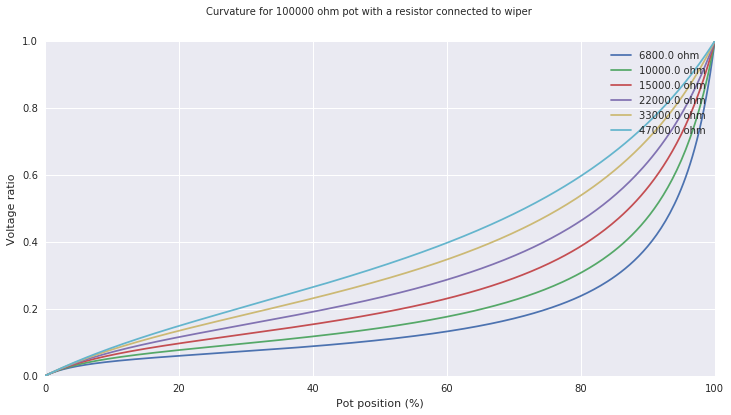

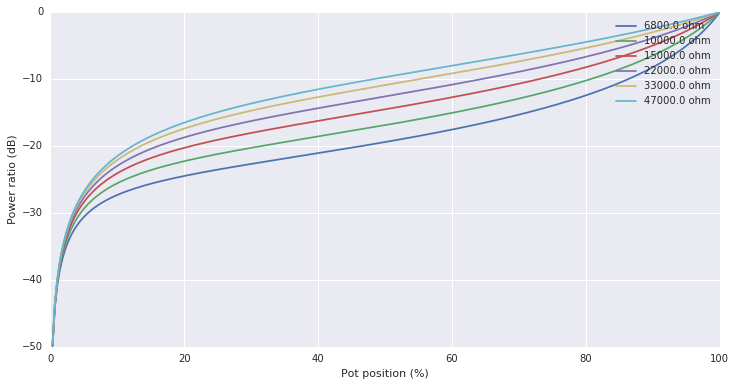

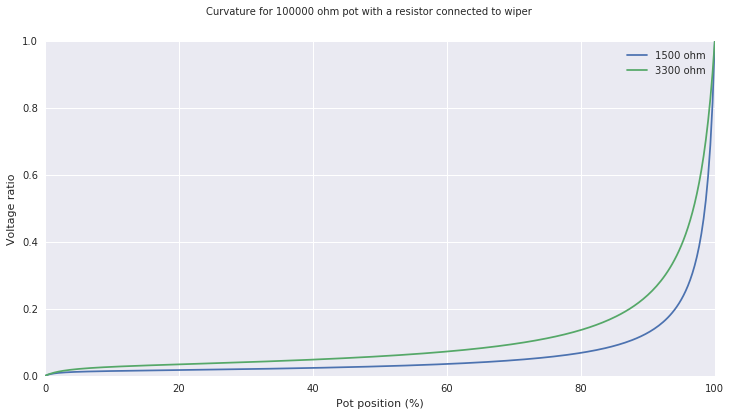

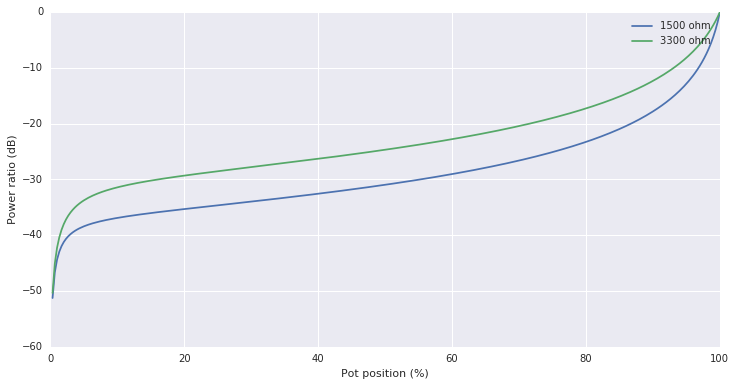

In [113]:
# Example for 100k pot
pot_curves(100e3)

pot_curves(100e3, rcurves=[1500, 3300]) # custom resistor values